<a href="https://colab.research.google.com/github/kevinMGII/Grupo7-Practica2/blob/main/Grupo7_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEGUNDA PRÁCTICA**. Predicción del Abandono de Empleados.

Grupo 7. Miembros:

*   *Bárbara Sánchez Moratalla, 100495857.*
*   *Kevin Medina García, 100495893.*



---

### **1. CARGA Y VISUALIZACIÓN DE LOS DATOS**

- Carga de librerías necesarias

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

- Lectura de datos y fijación de la semilla

In [29]:
NIA = 100495857                                                                 # Definimos NIA para reproducibilidad

dataframe_semillas = pd.read_csv('semillas.csv')                                # Leemos el archivo y lo almacenamos en un dataFrame
display(dataframe_semillas.head())                                              # Mostramos las primeras filas del dataframe

,area,perimetro,compacidad,longitud,anchura,asimetria,surco,clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### **2. ELECCIÓN DEL ESCALADOR MÁS APROPIADO**

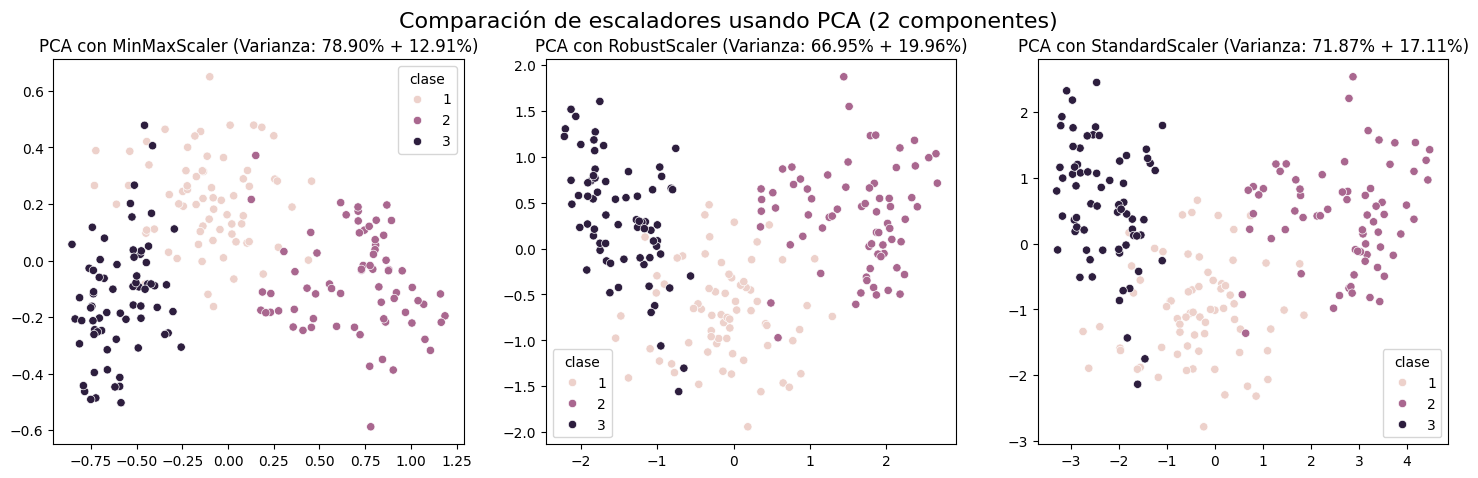

In [30]:
escaladores = {                                                                 # Definimos los escaladores a probar
    'MinMaxScaler': MinMaxScaler(),                                             # Escalador que normaliza los datos en el rango [0, 1]
    'RobustScaler': RobustScaler(),                                             # Escalador robusto que utiliza la mediana y el IQR para minimizar la influencia de outliers
    'StandardScaler': StandardScaler()                                          # Escalador que estandariza los datos restando la media y dividiendo por la desviación estándar
}

figura_completa, ejes = plt.subplots(1, 3, figsize=(18, 5))                     # Preparamos una figura para comparar los PCA de cada escalado

objetivo = dataframe_semillas['clase']                                          # Obtenemos la variable objetivo
atributos = dataframe_semillas.drop(columns=['clase'])                          # Obtenemos los atributos (X) del dataset

contador = 0                                                                    # Inicializamos un contador para recorrer cada uno de los subplots

for elem in escaladores:                                                        # Recorremos cada uno de los escaladores

    escalador_actual = escaladores[elem]                                        # Obtenemos el escalador actual
    X_escalado = escalador_actual.fit_transform(atributos)                      # Escalamos los datos

    modelo_pca = PCA(n_components=2, random_state=NIA)                          # Definimos el PCA con 2 componentes para reproducibilidad
    X_pca = modelo_pca.fit_transform(X_escalado)                                # Aplicamos PCA a los datos escalados
    explained_variance = modelo_pca.explained_variance_ratio_                   # Obtenemos la varianza explicada de cada componente

    eje_actual = ejes[contador]                                                 # Obtenemos el eje correspondiente

    sns.scatterplot(                                                            # Graficamos los datos en el eje actual
        x=X_pca[:, 0],                                                          # Primer componente principal en el eje X
        y=X_pca[:, 1],                                                          # Segundo componente principal en el eje Y
        hue=objetivo,                                                           # Coloreamos según la variable objetivo 'clase'
        ax=eje_actual                                                           # Indicamos en cuál subplot se dibuja
    )

    titulo = "PCA con {} (Varianza: {:.2%} + {:.2%})".format(elem, explained_variance[0], explained_variance[1])      # Establecemos el título del subplot
    eje_actual.set_title(titulo)                                                                                      # Asignamos el título al subplot

    contador += 1                                                               # Pasamos al siguiente subplot

plt.suptitle("Comparación de escaladores usando PCA (2 componentes)", fontsize=16)  # Título general de la figura
plt.show()                                                                          # Mostramos la figura con todos los subplots

Emilio me ha dicho que lo justifique como: cogemos el de mayor varianza para poder agrupar mejor los datos. Cuanto mas separados esten (mas varianza) mejor los voy a poder agrupar. Me ha dicho que el viendo esto elegiria minmaxscaler. Me ha dicho que si queremos meterlo en 3d tambien como extra, pero que la suda un poco eso.

### **3. CLUSTERING USANDO LOS DATOS TRANSFORMADOS (2D)**

Usamos los datos transformados a 2D obtenidos del PCA (con el escalador elegido, en este ejemplo se usará "elmejorquesea") para aplicar tres técnicas de clustering:

- K-Means
- Clustering jerárquico (dendrogramas)
- DBSCAN

- Preparamos los datos con MejorEscalador y PCA

In [31]:
# 1.- Elegimos el mejor escalador -> Hecho
# 2.- Lo metemos en un Pipeline con PCA -> Hecho
# 3.- Entrenamos al Pipeline (.fit)
  # 3.1.- El resultado el (.fit) se le asigna a una variable, esos son los Datos Transformados en 2d

  # Nota 1: como recordamos de las diapos, PCA es para jugar con la dimensionalidad. 2 componentes -> 2D
  # Nota 2: aplicar el .fit al pipeline significa escalar y realizar el PCA a la vez, se hace asi, como en la practica anterior.

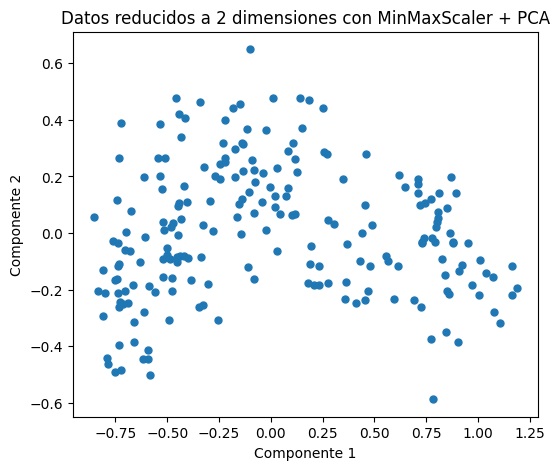

In [32]:
from sklearn.pipeline import Pipeline                                           # Importamos el Pipeline

pipe = Pipeline([                                                               # Creamos un Pipeline
    ('scaler', MinMaxScaler()),                                                 # Primer paso: elegimos el mejor escalador
    ('pca', PCA(n_components=2, random_state=NIA))                              # Segundo paso: aplicamos PCA para reducir la dimensionalidad a 2 componentes; se utiliza NIA como semilla para reproducibilidad
])

X_2d = pipe.fit_transform(atributos)                                            # Entrenamos el Pipeline a los datos 'atributos' y transformamos dichos datos a 2 dimensiones; se guarda el resultado en X_2d

plt.figure(figsize=(6, 5))                                                      # Creamos una figura para visualizar el gráfico
plt.scatter(X_2d[:, 0],                                                         # Usamos la primera columna de X_2d (primer componente principal) para el eje X
            X_2d[:, 1],                                                         # Usamos la segunda columna de X_2d (segundo componente principal) para el eje Y
            s=25                                                                # Establecemos el tamaño de cada punto a 25
            )

plt.title("Datos reducidos a 2 dimensiones con MinMaxScaler + PCA")             # Asignamos un título al gráfico
plt.xlabel("Componente 1")                                                      # Asignamos un título al eje X
plt.ylabel("Componente 2")                                                      # Asignamos un título al eje Y
plt.show()                                                                      # Mostramos el gráfico en pantalla

**KMeans**
- Método del codo

In [33]:
# 1.- En K-means, si recordamos, es necesario determinar el número de clusters
  # Nota: como no sabemos cuantos puede haber, probamos dando un rango: num_clusters = range(2, 15) por ejemplo
  # 1.1.- Se puede hacer con el metodo del codo (revisar diapos)
    # 1.1.1.- Visualizamos los datos con mathplotlib
  # 1.2.- Se puede hacer con el indice silhouette (revisar diapos) from sklearn.metrics import silhouette_score
    # 1.2.1.- Visualizamos los datos con mathplotlib
# 4.- Aplicamos KMeans de from sklearn.cluster import KMeans con el número de clusters
# 3.- Visualizamos los datos con mathplotlib

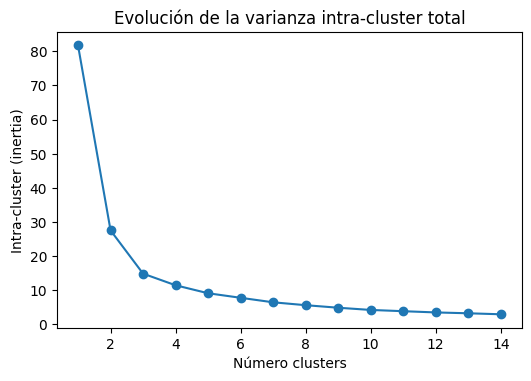

In [34]:
from sklearn.cluster import KMeans                                              # Importamos KMeans

range_n_clusters = range(1, 15)                                                 # Definimos un rango de clusters para probar
inertias = []                                                                   # Inicializamos una lista para almacenar las inercias

for n_clusters in range_n_clusters:                                             # Recorremos cada cluster
    modelo_kmeans = KMeans(                                                     # Definimos un modelo KMeans
                           n_clusters=n_clusters,                               # Creamos un modelo KMeans con el número de clusters actual
                           n_init=20,                                           # Ponemos 20 inicializaciones
                           random_state=NIA                                     # Fijamos la semilla para reproducibilidad
                           )
    modelo_kmeans.fit(X_2d)                                                     # Entrenamos el modelo con los datos en 2d (X_2d)
    inertias.append(modelo_kmeans.inertia_)                                     # Guardamos en la lista la inercia del modelo

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))                                 # Creamos una figura para visualizar el gráfico
ax.plot(range_n_clusters, inertias, marker='o')                                 # Graficamos la inercia en función del número de clusters

ax.set_title("Evolución de la varianza intra-cluster total")                    # Añadimos un título al gráfico
ax.set_xlabel('Número clusters')                                                # Etiquetamos el eje X indicando el número de clusters
ax.set_ylabel('Intra-cluster (inertia)');                                       # Etiquetamos el eje Y indicando la inercia

Vemos como el valor óptimo es K=3, como ya sabíamos. Tenemos que buscar en la gráfica justo el punto en el que aparece un codo, en este caso Emilio dice que sería 2 o 3. A partir de ahi ya no merece la pena.

- Usando silhouette

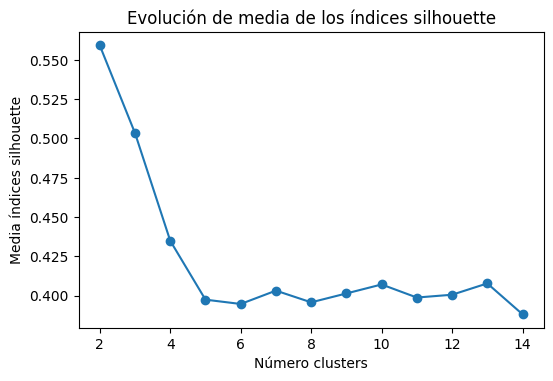

In [35]:
from sklearn.metrics import silhouette_score                                    # Importamos la función silhouette_score para evaluar la calidad de nuestros clusters

range_n_clusters = range(2, 15)                                                 # Definimos un rango de posibles números de clusters (desde 2 hasta 14) para probar distintas configuraciones
valores_medios_silhouette = []                                                  # Inicializamos una lista para almacenar los valores medios de silhouette para cada número de clusters

for n_clusters in range_n_clusters:                                             # Recorremos cada número de clusters
    modelo_kmeans = KMeans(                                                     # Definimos un modelo KMeans
                          n_clusters=n_clusters,                                # Establecemos el número de clusters actual
                          n_init=25,                                            # Ponemos 20 inicializaciones
                          random_state=NIA                                      # Fijamos la semilla para reproducibilidad
                          )
    cluster_labels = modelo_kmeans.fit_predict(X_2d)                            # Entrenamos el modelo y obtenemos las etiquetas de los clusters
    silhouette_avg = silhouette_score(X_2d, cluster_labels)                     # Calculamos el índice silhouette para evaluar la calidad de los clusters
    valores_medios_silhouette.append(silhouette_avg)                            # Guardamos el valor medio de silhouette en la lista

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))                                 # Creamos una figura para visualizar el gráfico
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')                # Dibujamos un gráfico de líneas: en el eje X el número de clusters y en el eje Y el índice silhouette promedio
ax.set_title("Evolución de media de los índices silhouette")                    # Añadimos un título al gráfico
ax.set_xlabel('Número clusters')                                                # Etiquetamos el eje X para indicar que representa el número de clusters
ax.set_ylabel('Media índices silhouette');                                      # Etiquetamos el eje Y para indicar que muestra la media de los índices silhouette

En este ejemplo se utiliza el análisis de silhouette para elegir un valor óptimo para n_clusters. El gráfico de silhouette muestra que los valores n_clusters de 2 y 3 son una buena elección para los datos dados. Como sabemos, cuanto menor es el índice silhouette, peor es.

- Aplicación final de KMeans

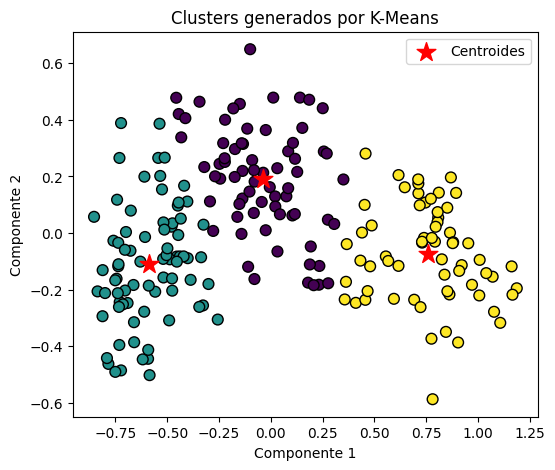

In [36]:
km_final = KMeans(n_clusters=3, n_init=25, random_state=NIA)                    # Creamos un KMeans con 3 clusters, 25 inicializaciones y semilla NIA para reproducibilidad
clusters_km = km_final.fit_predict(X_2d)                                        # Entrenamos el KMeans usando los datos en 2d (X_2d) y asignamos cada punto a un cluster

plt.figure(figsize=(6, 5))                                                      # Creamos una figura para visualizar el gráfico

# ════════════════════════════ Dibujamos los puntos ════════════════════════════

plt.scatter(x = X_2d[:, 0],                                                     # Graficamos los puntos, primera componente para el eje X
            y = X_2d[:, 1],                                                     # Graficamos los puntos, segunda componente para el eje Y
            c=clusters_km,                                                      # Coloreamos los puntos de cada cluster
            s=60,                                                               # Tamaño de cada punto
            edgecolor='black')                                                  # Ponemos el borde de cada punto a negro

# ═══════════════════ Dibujamos los centroides (estrellitas) ═══════════════════

plt.scatter(km_final.cluster_centers_[:, 0],                                    # Dibujamos los centroides, primera coord de cada centroide para el eje X
            km_final.cluster_centers_[:, 1],                                    # Dibujamos los centroides, segunda coord de cada centroide para el eje Y
            c='red',                                                            # Coloreamos los centroides en rojo
            s=200,                                                              # Ponemos un tamaño muy alto para destacar los centroides
            marker='*',                                                         # Ponemos que los centroides sean una estrellita
            label='Centroides')                                                 # Ponemos un label para la leyenda

plt.title("Clusters generados por K-Means")                                     # Asignamos un título al gráfico
plt.xlabel("Componente 1")                                                      # Asignamos un título al eje X
plt.ylabel("Componente 2")                                                      # Asignamos un título al eje Y
plt.legend()                                                                    # Mostramos la leyenda
plt.show()                                                                      # Mostramos el gráfico en pantalla

**Clustering jerárquico (dendogramas)**

**DBSCAN**